In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:

fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')

fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [117]:
fish['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [118]:
dummies = pd.get_dummies(fish['Species'])
fish = pd.concat([fish, dummies], axis=1)
fish.drop('Species',axis = 1, inplace = True)

In [119]:
fish

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [120]:
fish.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [121]:
x = fish[fish.columns[1:]]


In [122]:
y = fish['Weight']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [124]:
train_data = LinearRegression().fit(X_train, y_train)

In [125]:
prediction = train_data.predict(X_test)

In [126]:
prediction

array([ 2.52413687e+01,  5.95421494e-01,  2.08449859e+02,  3.31665261e+02,
        2.15482994e+02,  7.53929942e+02, -7.24585071e+01,  2.53698723e+02,
        2.59678480e+02,  1.18648573e+03,  6.00206027e+02,  8.47635320e+02,
        5.37239650e+02,  1.52193053e+02,  6.78093881e+02,  8.17925786e+02,
        1.02085423e+03,  2.81460586e+02,  2.21230474e+02,  5.80928938e+02,
       -2.65982999e+01,  5.79658685e+02,  5.06143757e+02,  4.79971143e+02,
        8.14231017e+02,  9.65625735e+02,  2.18708642e+02,  3.55983349e+02,
       -1.02621031e+02, -2.80999101e+01,  5.98136370e+02, -1.80105070e+01,
       -1.04683495e+02,  7.28061602e+02,  3.58027459e+02,  1.63308996e+02,
        1.88699604e+02,  1.09828388e+02,  2.04508008e+02,  7.80041169e+02,
        6.78083828e+02,  7.28191073e+02, -7.67869255e+01,  1.79681138e+02,
        1.92874650e+02,  6.19181650e+00,  1.35603189e+02,  6.51314578e+02,
        1.35643024e+02,  7.02557771e+01,  7.20492577e+02,  4.85662042e+02,
        5.38647607e+02])

In [127]:
spejimai = pd.Series(data=prediction, name = "Prediction")

In [128]:
result = pd.concat([y_test.reset_index(), spejimai], axis =1)[['Weight', 'Prediction']]

In [129]:
train_data.score(X_test, y_test)

0.9405192628555373

In [130]:
result

,Weight,Prediction
0,78.0,25.241369
1,13.4,0.595421
2,200.0,208.449859
3,270.0,331.665261
4,150.0,215.482994
5,1000.0,753.929942
6,7.0,-72.458507
7,180.0,253.698723
8,188.0,259.678480
9,1250.0,1186.485729


In [131]:
%matplotlib inline

In [132]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [133]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
corr = heart.corr()

<Axes: >

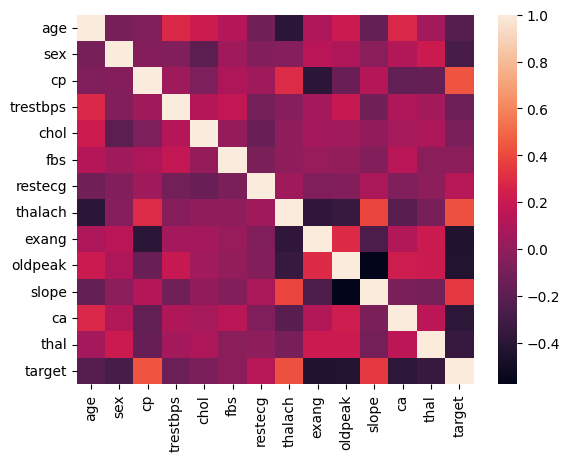

In [135]:
sns.heatmap(corr)

In [143]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0', 'slope1', 'slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [146]:
dummies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dummies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


In [147]:
heart.drop(columns = ['ca', 'cp', 'slope', 'thal'], inplace = True)
data_frame = pd.concat([heart, dummies], axis = 1)


In [148]:
data_frame.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


In [149]:
x = data_frame.drop('target', axis = 1)


In [150]:
y = data_frame['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size = 0.4, random_state=42)
